In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm", 
]

samples_bkg = [
    "TTJets",
    "DYJet",
    "WW",
    "WZ",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1, location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "testgen", max_files=1, location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_4mu['DYJet'] = fileset_bkg['DYJet']
fileset_4mu['WW'] = fileset_bkg['WW']
fileset_4mu['WZ'] = fileset_bkg['WZ']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["electron_base", "photon_base", "muon_base", "lj_base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [4]:
samples_4mu = [
    "TTJets",
    "DYJet",
    "WW",
    "WZ",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
]

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

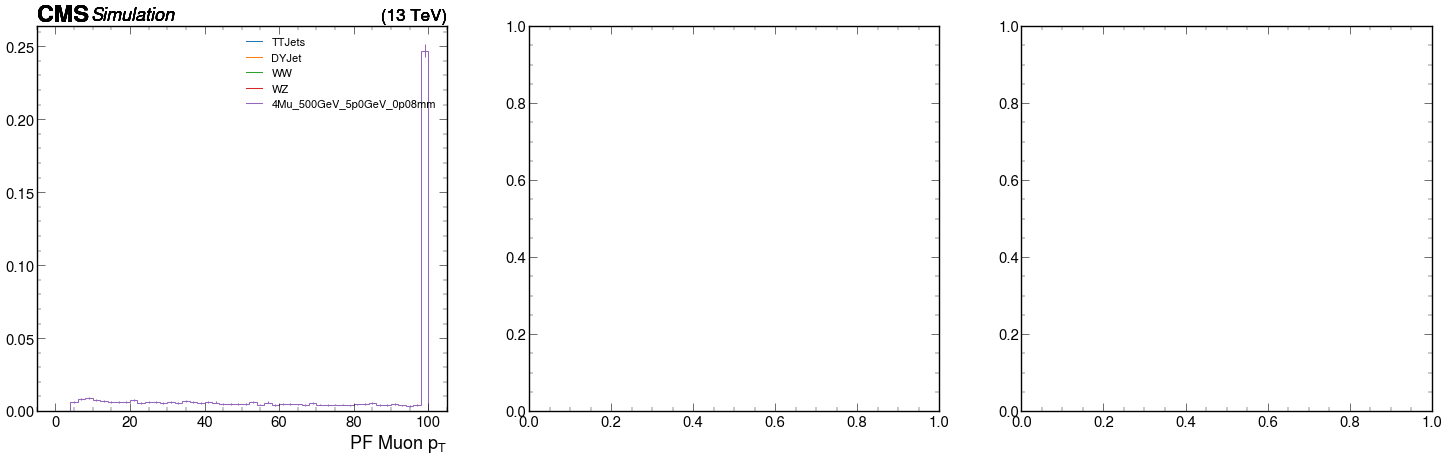

In [7]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["muon_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

In [8]:
for sample in samples_4mu:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 0
TTJets Total Mu-LJs 0
TTJets Total EGM-LJs 0

TTJets Total Matched-Jets 0
TTJets Total Leading-Mu-Matched-Jets 0
TTJets Total Subleading-Mu-Matched-Jets 0
TTJets Total EGM-Matched-Jets 0
##############################

DYJet Total LJs 0
DYJet Total Mu-LJs 0
DYJet Total EGM-LJs 0

DYJet Total Matched-Jets 0
DYJet Total Leading-Mu-Matched-Jets 0
DYJet Total Subleading-Mu-Matched-Jets 0
DYJet Total EGM-Matched-Jets 0
##############################

WW Total LJs 0
WW Total Mu-LJs 0
WW Total EGM-LJs 0

WW Total Matched-Jets 0
WW Total Leading-Mu-Matched-Jets 0
WW Total Subleading-Mu-Matched-Jets 0
WW Total EGM-Matched-Jets 0
##############################

WZ Total LJs 0
WZ Total Mu-LJs 0
WZ Total EGM-LJs 0

WZ Total Matched-Jets 0
WZ Total Leading-Mu-Matched-Jets 0
WZ Total Subleading-Mu-Matched-Jets 0
WZ Total EGM-Matched-Jets 0
##############################

4Mu_500GeV_5p0GeV_0p08mm Total LJs 3358
4Mu_500GeV_5p0GeV_0p08mm Total Mu-LJs 3354
4Mu_500GeV_5p0GeV_0p08mm Tot

In [43]:
for sample in samples_2mu:
    print(sample, "Total LJs", out_2mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_2mu[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_2mu[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 1825
TTJets Total Mu-LJs 898
TTJets Total EGM-LJs 927

TTJets Total Matched-Jets 1813
TTJets Total Leading-Mu-Matched-Jets 872
TTJets Total Subleading-Mu-Matched-Jets 37
TTJets Total EGM-Matched-Jets 867
##############################

2Mu2E_500GeV_5p0GeV_0p08mm Total LJs 74163
2Mu2E_500GeV_5p0GeV_0p08mm Total Mu-LJs 37078
2Mu2E_500GeV_5p0GeV_0p08mm Total EGM-LJs 37085

2Mu2E_500GeV_5p0GeV_0p08mm Total Matched-Jets 74118
2Mu2E_500GeV_5p0GeV_0p08mm Total Leading-Mu-Matched-Jets 37058
2Mu2E_500GeV_5p0GeV_0p08mm Total Subleading-Mu-Matched-Jets 21
2Mu2E_500GeV_5p0GeV_0p08mm Total EGM-Matched-Jets 37046
##############################

2Mu2E_500GeV_5p0GeV_0p8mm Total LJs 30287
2Mu2E_500GeV_5p0GeV_0p8mm Total Mu-LJs 15135
2Mu2E_500GeV_5p0GeV_0p8mm Total EGM-LJs 15152

2Mu2E_500GeV_5p0GeV_0p8mm Total Matched-Jets 30266
2Mu2E_500GeV_5p0GeV_0p8mm Total Leading-Mu-Matched-Jets 15132
2Mu2E_500GeV_5p0GeV_0p8mm Total Subleading-Mu-Matched-Jets 3
2Mu2E_500GeV_5p0GeV_0p8mm Total EGM-

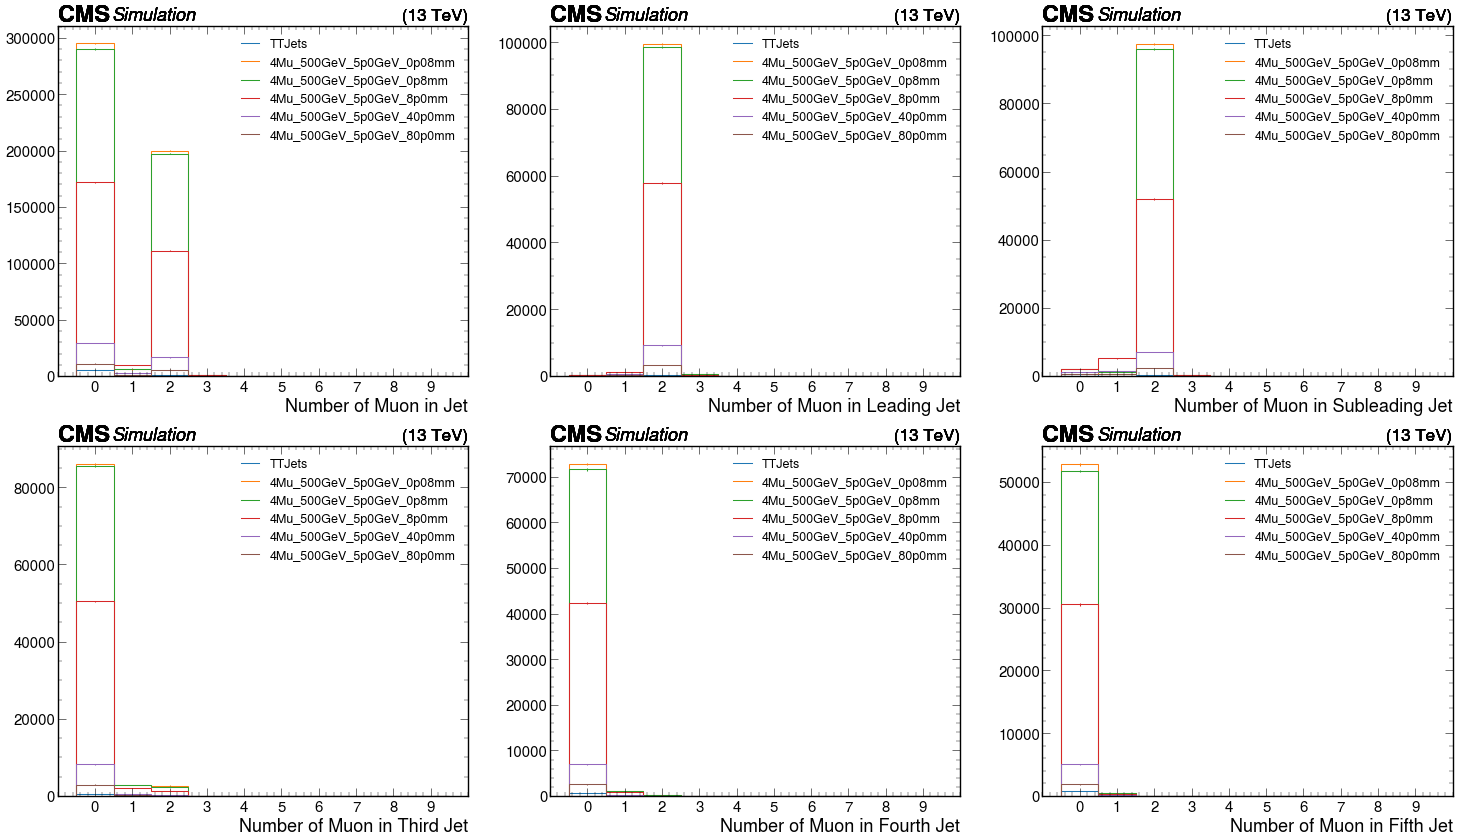

In [44]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})